In [2]:
# Importing libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statistics
import math 
# !pip install statsmodels
from statsmodels.graphics import tsaplots
import statsmodels.api as smodels

### Question 1

In [3]:
# The population mean is 7725
# Null hypothesis (Ho): The women’s energy intake have a mean of 7725 kJ. Ho=> µ = 7725
# Alternative hypothesis (H1): The women’s energy intake deviates systematically from the mean of 7725 kJ. H1 => µ ≠ 7725

sampleDailyEnergy = [5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770] # Sample women’s energy intake in kJ 

print("The population mean is:", 7725)                                              # Population mean
print("The sample mean is:", statistics.mean(sampleDailyEnergy))                    # Calculating and displaying the sample mean

# Using statistics.stdev to estimate the standard deviation from a population using sample of data
print("The sample standard deviation is:", statistics.stdev(sampleDailyEnergy))     # The sample standard deviation
print("The standard error of the mean (SEM) is:", stats.sem(sampleDailyEnergy))     # The standard error of the mean (SEM) 
print("The degrees of freedom is:", len(sampleDailyEnergy) - 1)                     # The degree of freedom dF = n − 1
stats.sem(sampleDailyEnergy)

# Calculating the t statistic and p-value
tStatistic, pValue = stats.ttest_1samp(a = sampleDailyEnergy, popmean = 7725)
print("The t statistic is:", tStatistic)
print("The p-value is:", pValue)

# A two-tailed hypothesis is an appropriate test because the alternative hypothesis contains the not equal “≠” sign.
# Because the p-value(0.018137235176105812) is less than (alpha level) α = 0.05, thus the null hypothesis can be rejected.
# This confirms that the women’s energy intake deviates systematically from a recommended value of 7725 kJ.

The population mean is: 7725
The sample mean is: 6753.636363636364
The sample standard deviation is: 1142.1232221373727
The standard error of the mean (SEM) is: 344.3631083801271
The degrees of freedom is: 10
The t statistic is: -2.8207540608310193
The p-value is: 0.018137235176105812


### Question 2

In [4]:
# Ho: Guinness served in an Irish pub is better than pints served elsewhere around the globe: Ir > Else
# H1: Guinness served in an Irish pub is not better than pints served elsewhere around the globe: !(Ir > Else)
# This is a 2-sample t-test as it analyzes the difference between the means of two independent samples.
################################################################################################################################

sampleSizeIrel = 42      # n1
sampleSizeElse = 61      # n2
meanIrel = 74            # mean1
meanElse = 57            # mean2
stdIrel = 7.4            # std1
stdElse = 7.1            # std2

tStat, pVal = stats.ttest_ind_from_stats(mean1 = meanIrel, std1 = stdIrel, nobs1 = sampleSizeIrel, mean2 = meanElse, std2 = stdElse, nobs2 = sampleSizeElse, equal_var = False) 
print("The t statistic is:", tStat)
print("The p-value is:", pVal)

dF = sampleSizeIrel + sampleSizeElse -2   # Calculating the degree of freedom
print("The degree of freedom is:", dF)

The t statistic is: 11.647653131319812
The p-value is: 2.3158901628742276e-19
The degree of freedom is: 101


### Question 3

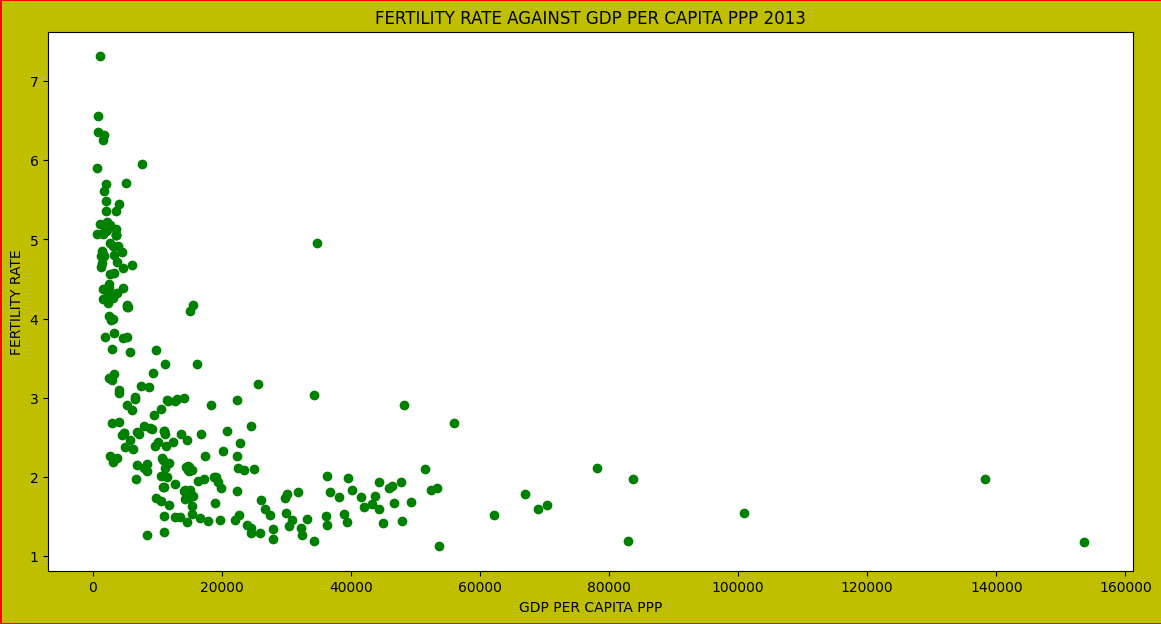

In [5]:
fertRate = pd.read_excel('API_SP.DYN.TFRT.IN_DS2_en_excel_v2_4521929.xls', sheet_name = 'Data', skiprows = 3)    # Reading fertility rate data from excel file
gdpPC = pd.read_excel('API_NY.GDP.PCAP.PP.CD_DS2_en_excel_v2_4546474.xls', sheet_name = 'Data', skiprows = 3)    # Reading GDP data from excel file

# Extracting only Country Name and the year 2013 to use
fertRateExtracted = fertRate[['Country Name', '2013']]
gdpPCExtracted= gdpPC[['Country Name', '2013']]

# Plotting: Defining figure properties
plt.figure(figsize = (14, 7), edgecolor = 'r', facecolor = 'y', linewidth = 1)

# Adding the title and labels to the plot
plt.title("FERTILITY RATE AGAINST GDP PER CAPITA PPP 2013")
plt.xlabel("GDP PER CAPITA PPP")
plt.ylabel("FERTILITY RATE")

# Plotting Fertility rate versus GDP per capita PPP for 2013 year
plt.scatter(gdpPCExtracted['2013'], fertRateExtracted['2013'], marker = 'o', color = 'g')

# Showing the plot
plt.show()

# The fertility rate decreases significantly as the GDP increases.
# Countries with low GDP have a tremendous number of births per woman.

In [6]:
# Computing pairwise correlation given columns, excluding NA/null values.
ccf = gdpPCExtracted['2013'].corr(fertRateExtracted['2013'])
 
print("The correlation coefficient is:", ccf)     # Showing the result
# We have a negative relationship between our the fertility rate and GDP as correlation coefficient value is less than zero.
# Negative coefficients tells that when the fertility rate increases, the value of the GDP tends to decrease.

The correlation coefficient is: -0.525513538022326


### Question 4

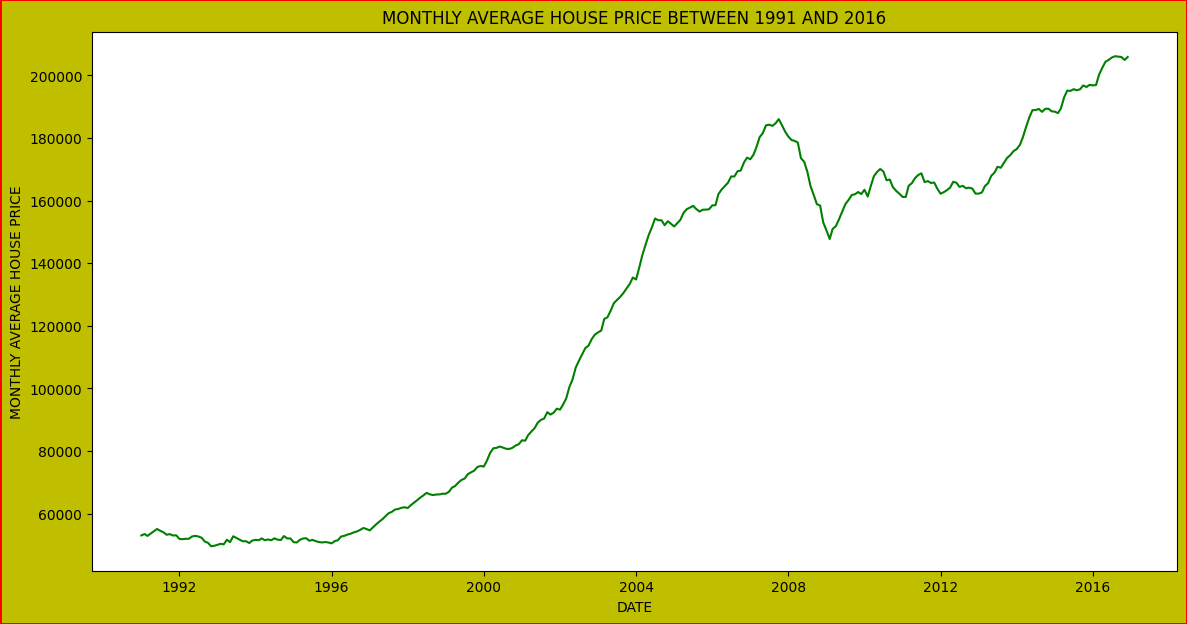

,Unnamed: 0,Average House Price,INDEX Q1 1993=100,Seasonally Adjusted Index,Monthly % Change (SA),Year % Change,Latest 3 months on previous 3 months
0,1991-01-01,53051.721106,105.832511,107.127299,NaN,NaN,NaN
1,1991-02-01,53496.798746,106.720393,107.494996,0.003432,NaN,NaN
2,1991-03-01,52892.861606,105.515603,106.525649,-0.009018,NaN,NaN
3,1991-04-01,53677.435270,107.080744,107.126622,0.005642,NaN,NaN
4,1991-05-01,54385.726747,108.493710,107.266757,0.001308,NaN,NaN
...,...,...,...,...,...,...,...
363,2021-04-01,238830.909855,476.442128,475.555369,0.023475,0.071399,0.017338
364,2021-05-01,242831.936735,484.423749,484.270329,0.018326,0.109317,0.024579
365,2021-06-01,245432.458835,489.611512,487.325181,0.006308,0.134147,0.039188
366,2021-07-01,244228.556584,487.209856,484.358757,-0.006087,0.105425,0.035456


In [7]:
mAvgHousePrice = pd.read_excel('Monthly Average House Price.xls')    # Reading Monthly Average House Price data from excel file

mAvgHousePriceRenamed = mAvgHousePrice.rename(columns={'Unnamed: 0': 'Date'}) # Naming the Date column

# Accessing or selecting the data between 1991-01-01 and 2016-12-31 period
mAvgHousePrice19912016 = mAvgHousePriceRenamed.loc[(mAvgHousePriceRenamed['Date'] >= '1991-01-01') & (mAvgHousePriceRenamed['Date'] <= '2016-12-31')]

# Plotting: Defining figure properties
plt.figure(figsize = (14, 7), edgecolor = 'r', facecolor = 'y', linewidth = 1)

# Adding the title and labels to the plot
plt.title("MONTHLY AVERAGE HOUSE PRICE BETWEEN 1991 AND 2016")
plt.xlabel("DATE")
plt.ylabel("MONTHLY AVERAGE HOUSE PRICE")

# Plotting the average house price of the period between 1991-01-01 and 2016-12-31
plt.plot(mAvgHousePrice19912016['Date'], mAvgHousePrice19912016['Average House Price'], color = 'g')

# Showing the plot
plt.show()
# The graph shows that the monthly average increases by the time
mAvgHousePrice

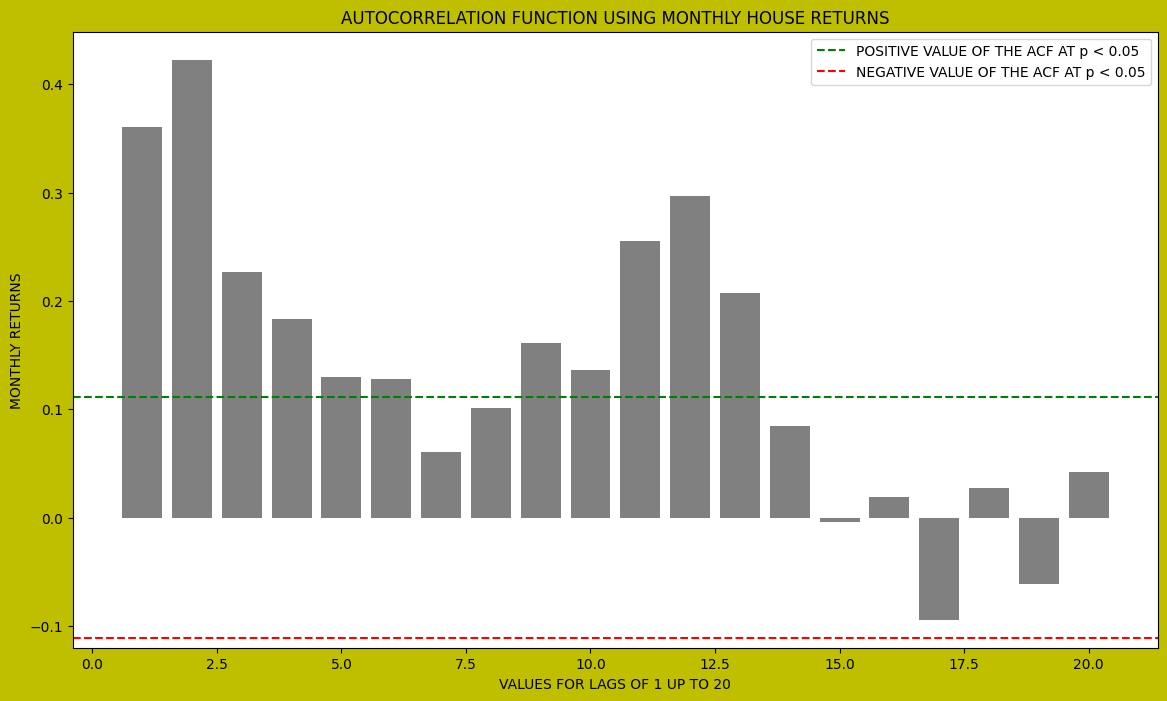

In [8]:
# r(t) = [p(t)/p(t-1)]-1
AHPMonthlyReturns = []

for k in range(1, len(mAvgHousePrice19912016['Average House Price'])):    # Calculating and storing the returns into the list
    AHPMonthlyReturns.append((mAvgHousePrice19912016['Average House Price'][k] / mAvgHousePrice19912016['Average House Price'][k - 1]) - 1)
    
# Plotting: Defining figure properties
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["figure.facecolor"] = "y"
plt.rcParams["figure.edgecolor"] = "r"

acf = smodels.tsa.acf(AHPMonthlyReturns)                                  # Calculate autocorrelations

acf20 = acf[1:21]                                                         # Selecting 20 values from autocorrelations
lags = np.arange(1, 21)                                                   # Defining lags to use

# Plotting the ACF function using the monthly returns
plt.bar(lags, acf20, color = 'gray')

# Adding the title and labels to the plot
plt.title("AUTOCORRELATION FUNCTION USING MONTHLY HOUSE RETURNS")
plt.ylabel("MONTHLY RETURNS")
plt.xlabel("VALUES FOR LAGS OF 1 UP TO 20")

# The formula for the ACF corresponding to (p = 0.5) is (+ or -) 1.96/(n)**0.5, where n = number of datapoints
value1 = 1.96 / (len(AHPMonthlyReturns) ** 0.5)
value2 = -1.96 / (len(AHPMonthlyReturns) ** 0.5)

# Indicating the values of the ACF at p < 0.05 by using horizontal lines
plt.axhline(value1, color = 'g', ls = "--", label = 'POSITIVE VALUE OF THE ACF AT p < 0.05')
plt.axhline(value2, color = 'r', ls = "--", label = 'NEGATIVE VALUE OF THE ACF AT p < 0.05')

plt.legend()

# Showing the plot
plt.show()

In [9]:
# ANNUALIZED RETURN OVER THE PERIOD OF 1991-01-01 AND 2016-12-31
nbrOfMonths = len(mAvgHousePrice19912016['Average House Price'])
EndingIndex = len(mAvgHousePrice19912016['Average House Price']) - 1

annualizedReturn = (((mAvgHousePrice19912016['Average House Price'][EndingIndex] / mAvgHousePrice19912016['Average House Price'][0]) ** (12 / nbrOfMonths))-1) * 100
print("The annualized return as percentage is", annualizedReturn)

The annualized return as percentage is 5.35423853535919


### Question 5

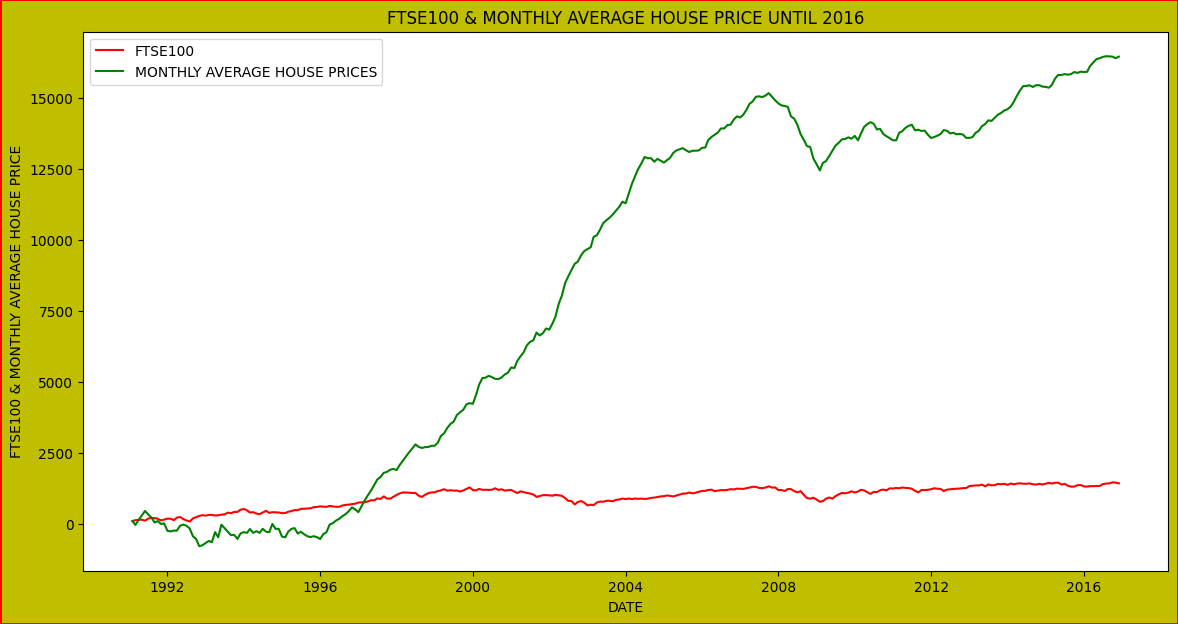

In [10]:
ftse100 = pd.read_csv('FTSE100.csv')                                  # Reading FTSE100 data from excel file
mAvgHousePrice = pd.read_excel('Monthly Average House Price.xls')     # Reading Monthly Average House Price data from excel file

mAvgHousePriceRenamed = mAvgHousePrice.rename(columns={'Unnamed: 0': 'Date'})  # Renaming the unnamed date field in house prices

ftse100['Date'] = pd.to_datetime(ftse100['Date']) # Converting to date time
ftse100Sorted = ftse100.sort_values(by = 'Date', ascending = True, ignore_index = True)    # Sorting the date to match the house prices data set

# Extracting house price data for the period of (01-Jan-1991 to 31-Dec-2016) | No need for FTSE since its period is correct
mAvgHousePrice19912016 = mAvgHousePriceRenamed.loc[(mAvgHousePriceRenamed['Date'] >= '1991-01-01') & (mAvgHousePriceRenamed['Date'] <= '2016-12-31')]

ftse100Returns = []                                                    # List to store the FTSE100 returns
housePricesReturns = []                                                # List to store the House prices returns

# Formula for monthly returns r(t) = [p(t)/p(t-1)] - 1
for i in range(1, len(ftse100Sorted['Adj Close'])):                    # Calculating and storing the returns into the list
    ftse100Returns.append((ftse100Sorted['Adj Close'][i] / ftse100Sorted['Adj Close'][i - 1]) - 1)

for i in range(1, len(mAvgHousePrice19912016['Average House Price'])): # Calculating and storing the returns into the list
    housePricesReturns.append((mAvgHousePrice19912016['Average House Price'][i] / mAvgHousePrice19912016['Average House Price'][i - 1]) - 1)

# Finding the cumulative sum of returns for FTSE100 and average monthly house prices
ftseCumSum = np.cumsum(ftse100Returns)
mAvgHousePrice19912016CumSum = np.cumsum(housePricesReturns)

# Normalizing cumulative sum of returns to start at 100
ftseCumSumNorm = (ftseCumSum / ftseCumSum[0]) * 100
mAvgHousePrice19912016CumSumNorm = (mAvgHousePrice19912016CumSum / mAvgHousePrice19912016CumSum[0]) * 100

# Plotting: Defining figure properties
plt.figure(figsize = (14, 7), edgecolor = 'r', facecolor = 'y', linewidth = 1)

# Adding the title and labels to the plot
plt.title("FTSE100 & MONTHLY AVERAGE HOUSE PRICE UNTIL 2016")
plt.xlabel("DATE")
plt.ylabel("FTSE100 & MONTHLY AVERAGE HOUSE PRICE")

ftse100Date = ftse100Sorted['Date'][1:]
mAvgHousePrice19912016Date = mAvgHousePrice19912016['Date'][1:]

# Plotting 
plt.plot(pd.to_datetime(ftse100Date), ftseCumSumNorm, color = 'r', label = 'FTSE100')
plt.plot(pd.to_datetime(mAvgHousePrice19912016Date), mAvgHousePrice19912016CumSumNorm, color = 'g', label = 'MONTHLY AVERAGE HOUSE PRICES')

# Showing the plot
plt.legend()
plt.show()

In [11]:
# ANNUALIZED RETURN
nbrOfMonths = len(ftse100Sorted['Adj Close'])
endingIndex = len(ftse100Sorted['Adj Close']) - 1
endingValue = ftse100Sorted['Adj Close'][endingIndex]
startingValue = ftse100Sorted['Adj Close'][0]

# Annualized Rate of Return Formula = ((Ending Value / Beginning Value) ** 1/n) – 1
annRetFTSE100 = (((endingValue / startingValue) ** (12 / nbrOfMonths))-1) * 100
print("The annualized return for the FTSE100 is", annRetFTSE100, "%")

The annualized return for the FTSE100 is 4.462515478640672 %
